In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

####1.	Read the dataframe, check null value if present then do the needful, check duplicate row , if present then do the needful

In [2]:
df=pd.read_csv('/content/drive/MyDrive/Datasets/spotify.csv')
df.isnull().sum()
df.duplicated().sum() # there 27 duplicate values
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

####2.	What is the distribution of popularity among the tracks in the dataset? Visualize it using a histogram?

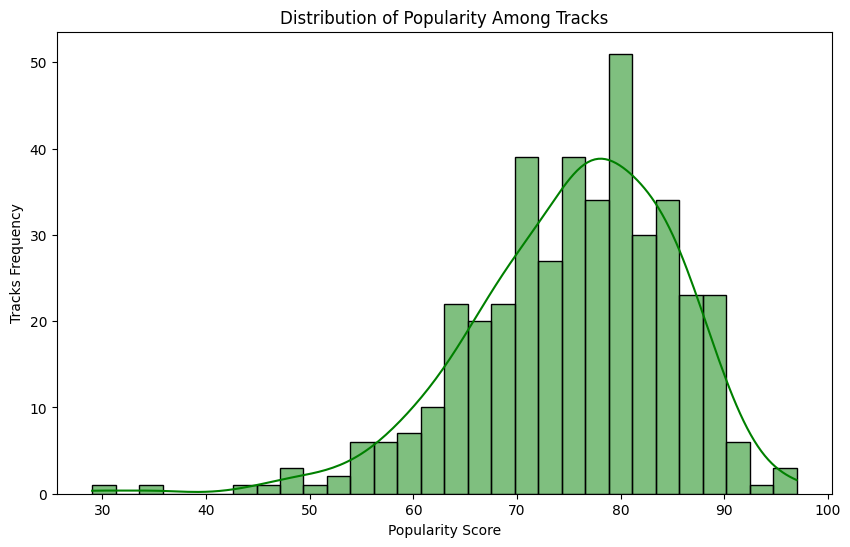

In [3]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Popularity'], bins=30, kde=True, color='green')
plt.title('Distribution of Popularity Among Tracks')
plt.xlabel('Popularity Score')
plt.ylabel('Tracks Frequency')
plt.show()

#####Insights>>> Popularity distrubution has left skewed means negatively skewed. so we can say that mean is typically less than the median due to the presence of lower outliers pulling the mean to the left.

####3.	Is there any relationship between the popularity and the duration of tracks? Explore this using a scatter plot

0.03899200928439096


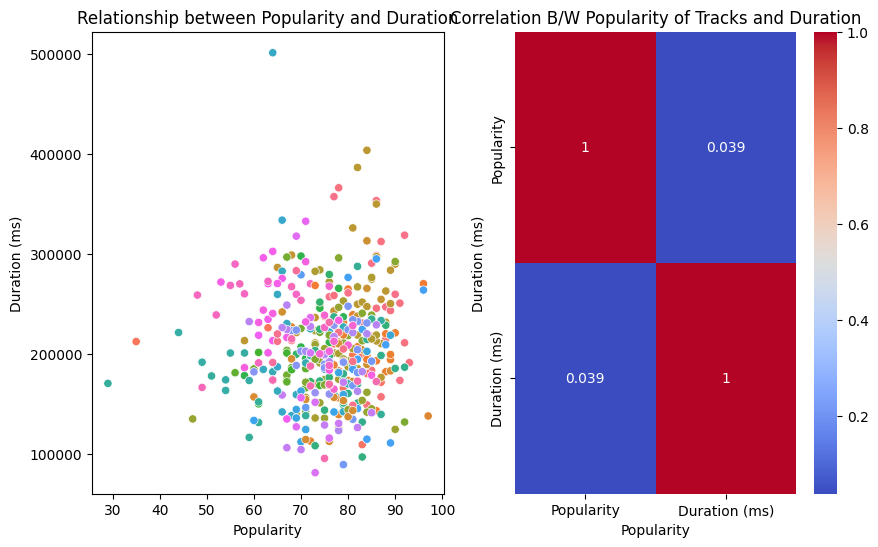

In [4]:
correlation=df['Popularity'].corr(df['Duration (ms)'])
print(correlation)
plt.figure(figsize=(10, 6))
correlation_matrix=df[['Popularity', 'Duration (ms)']].corr()
plt.subplot(1, 2, 1)
sns.scatterplot(x='Popularity', y='Duration (ms)', data=df, hue='Artist',legend=False)
plt.title('Relationship between Popularity and Duration')
plt.xlabel('Popularity')
plt.ylabel('Duration (ms)')

plt.subplot(1, 2, 2)
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation B/W Popularity of Tracks and Duration')
plt.xlabel('Popularity')
plt.ylabel('Duration (ms)')
plt.show()

#####Insights>>> We can see that Strong correlation between and Popularity and Duration of listnening.


####4.	Which artist has the highest number of tracks in the dataset? Display the count of tracks for each artist using a countplot

 The Artist by name Drake has delivered the Highest numbers of tracks i.e 17 


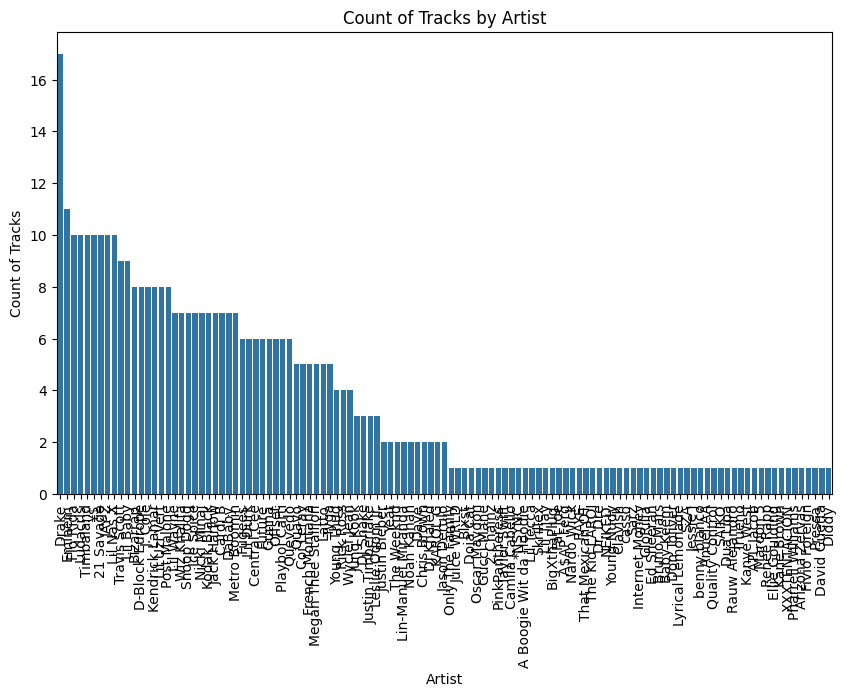

In [5]:
print(f" The Artist by name {df['Artist'].value_counts().idxmax()} has delivered the Highest numbers of tracks i.e {df['Artist'].value_counts().max()} ")
plt.figure(figsize=(10, 6))
sns.countplot(x='Artist', data=df, order=df['Artist'].value_counts().index)
plt.title('Count of Tracks by Artist')
plt.xlabel('Artist')
plt.ylabel('Count of Tracks')
plt.xticks(rotation=90)
plt.show()

####5.	What are the top 5 least popular tracks in the dataset? Provide the artist name and track name for each

In [6]:
least_popular_tracks = df.nsmallest(5, 'Popularity')
print(least_popular_tracks[['Artist', 'Track Name', 'Popularity']])

             Artist                     Track Name  Popularity
207          Pressa  Attachments (feat. Coi Leray)          29
231   Justin Bieber                     Intentions          35
413  French Montana                Splash Brothers          44
225        Lil Baby                  On Me - Remix          47
407     Wyclef Jean      911 (feat. Mary J. Blige)          48


####6.Among the top 5 most popular artists, which artist has the highest popularity on average? Calculate and display the average popularity for each artist

In [7]:
top_five_artists = df['Artist'].value_counts().nlargest(5).index
average_popularity_by_artist = df[df['Artist'].isin(top_five_artists)].groupby('Artist')['Popularity'].mean()
print(average_popularity_by_artist)
#

Artist
Drake        82.882353
Eminem       83.636364
Flo Rida     78.000000
Ludacris     63.000000
Timbaland    69.000000
Name: Popularity, dtype: float64


####7.	For the top 5 most popular artists, what are their most popular tracks? List the track name for each artist

In [14]:
top_five_artists = df['Artist'].value_counts().nlargest(5)
top_five_tracks_by_artist = df[df['Artist'].isin(top_five_artists.index)].groupby('Artist')['Track Name'].apply(list)
print(top_five_tracks_by_artist)

Artist
Drake        [Rich Baby Daddy (feat. Sexyy Red & SZA), One ...
Eminem       [Without Me, Mockingbird, The Real Slim Shady,...
Flo Rida     [Low (feat. T-Pain), Right Round, Wild Ones (f...
Ludacris     [Act A Fool, My Chick Bad, What's Your Fantasy...
Timbaland    [The Way I Are, Apologize, Give It To Me, If W...
Name: Track Name, dtype: object


####8.	Visualize relationships between multiple numerical variables simultaneously using a pair plot

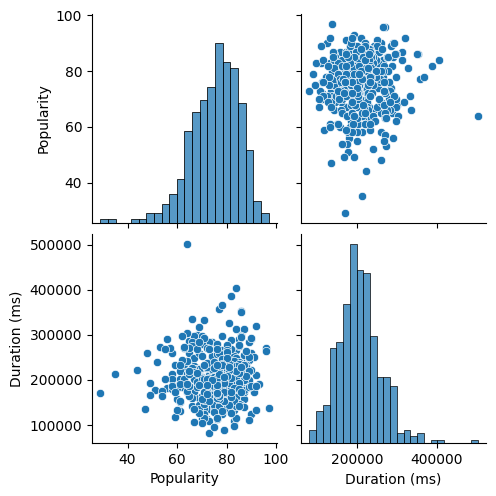

In [15]:
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
sns.pairplot(df[num_cols])
plt.show()

####9.	Does the duration of tracks vary significantly across different artists? Explore this visually using a box plot or violin plot

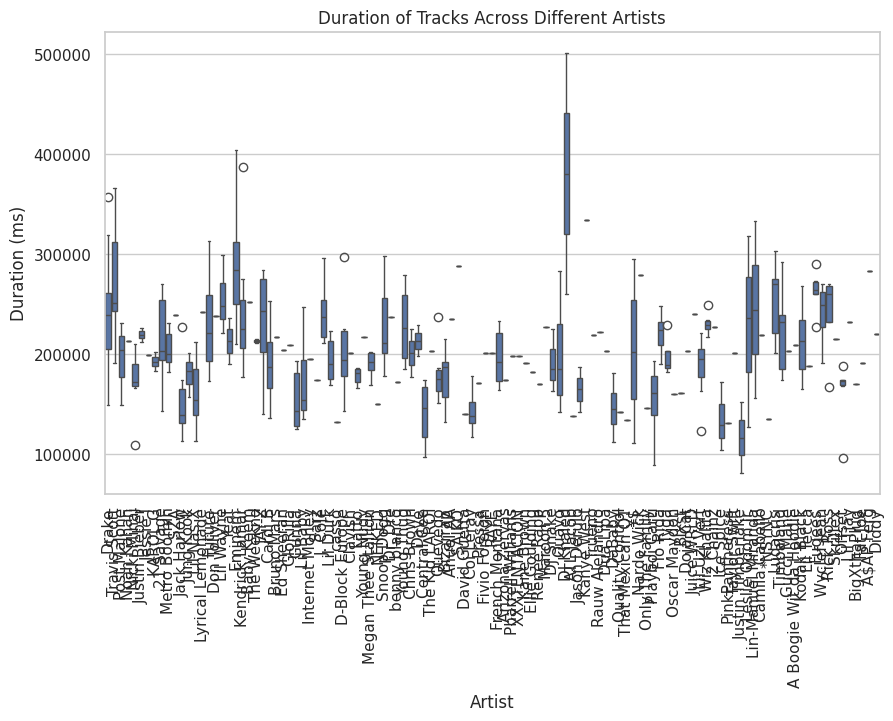

In [16]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.boxplot(x='Artist', y='Duration (ms)', data=df)
plt.title('Duration of Tracks Across Different Artists')
plt.xlabel('Artist')
plt.ylabel('Duration (ms)')
plt.xticks(rotation=90)
plt.show()

#####Insights>>> Yes, the duration of the tracks significantly varies from artist to artist.

####10.	How does the distribution of track popularity vary for different artists? Visualize this using a swarm plot or a violin plot.

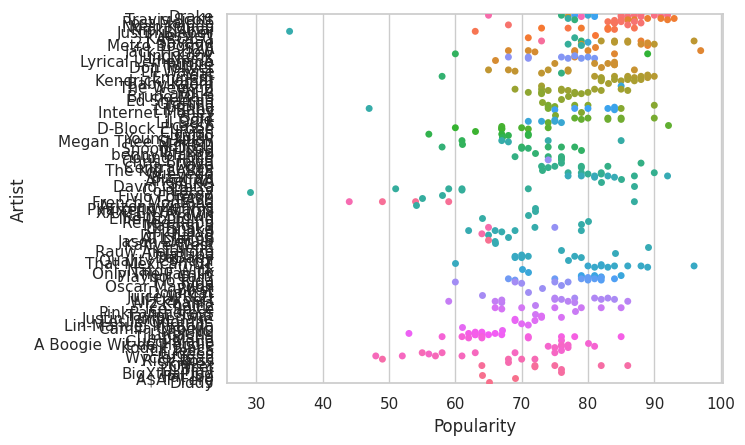

In [19]:
sns.swarmplot(x="Popularity", y="Artist", hue='Track Name',legend=False, data=df)
plt.show()

#####Insights>>>Yes, the track Popularity depnds on Artist as well.